<a href="https://colab.research.google.com/github/kocelifk/Robust-Regression/blob/main/RobustRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Regression
#Boston Housing Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RANSACRegressor

df = pd.read_csv('/content/housing.data', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Robust Regression


Random Sample Consensus (RANSAC) Algorithm

In [ ]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [ ]:
ransac = RANSACRegressor()

In [ ]:
ransac.fit(X, y)

RANSACRegressor()

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

In [ ]:
print(line_y_ransac)

[-12.3061051   -1.45357317   9.39895875  20.25149067  31.1040226
  41.95655452  52.80908645]


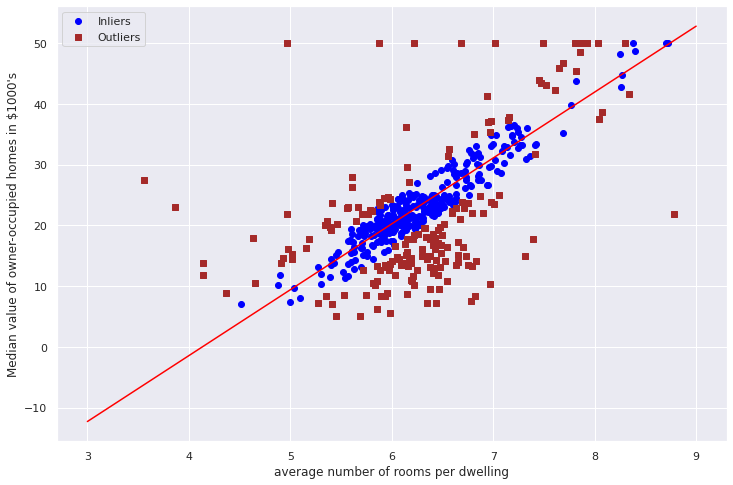

In [ ]:
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [ ]:
ransac.estimator_.coef_

array([10.85253192])

In [ ]:
ransac.estimator_.intercept_

-44.86370087169919

In [ ]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

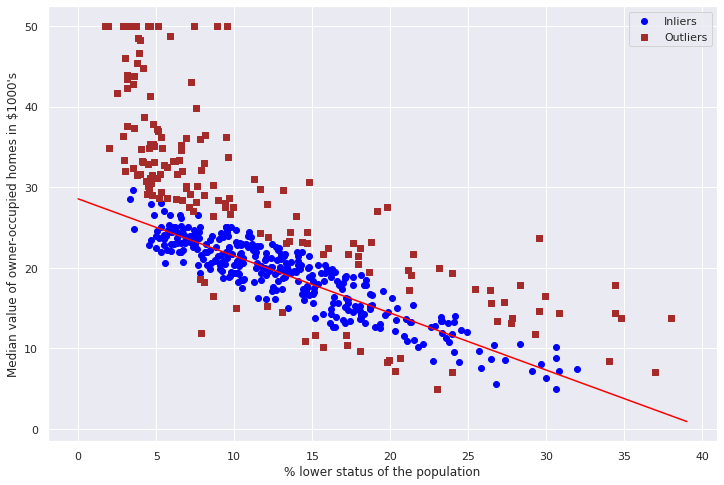

In [ ]:
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()